# Candlestick Ladder Bottom

https://www.investopedia.com/terms/l/ladder-bottom.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'BABA'
start = '2018-01-01'
end = '2021-10-22'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,176.399002,184.100006,175.699997,183.649994,183.649994,29916900
2018-01-03,185.190002,185.634995,181.399994,184.000000,184.000000,20121900
2018-01-04,185.899994,187.746994,184.429993,185.710007,185.710007,19473800
2018-01-05,187.169998,190.750000,186.300995,190.699997,190.699997,18168300
2018-01-08,190.460007,191.660004,189.070007,190.330002,190.330002,16230100


## Candlestick with Ladder Bottom

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,176.399002,184.100006,175.699997,183.649994,183.649994,29916900,True
1,736697.0,185.190002,185.634995,181.399994,184.000000,184.000000,20121900,False
2,736698.0,185.899994,187.746994,184.429993,185.710007,185.710007,19473800,False
3,736699.0,187.169998,190.750000,186.300995,190.699997,190.699997,18168300,True
4,736702.0,190.460007,191.660004,189.070007,190.330002,190.330002,16230100,False


Text(0, 0.5, 'Price')

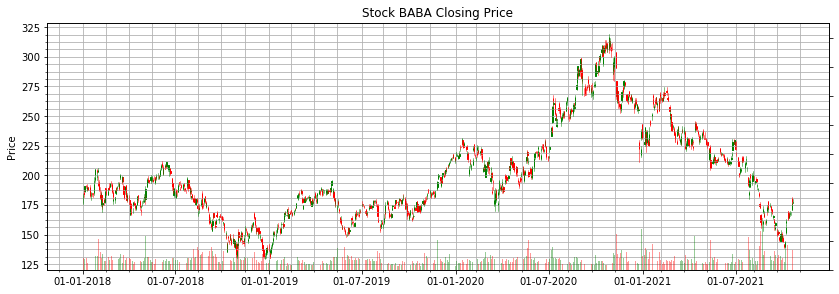

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
ladder_bottom = talib.CDLLADDERBOTTOM(df['Open'], df['High'], df['Low'], df['Close'])

ladder_bottom = ladder_bottom[ladder_bottom != 0]

In [6]:
df['ladder_bottom'] = talib.CDLLADDERBOTTOM(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['ladder_bottom'] !=0]

,Open,High,Low,Close,Adj Close,Volume,ladder_bottom
Date,,,,,,,
2018-04-26,173.250000,174.360001,172.050003,173.899994,173.899994,13398000,100
2021-07-09,202.050003,207.268005,201.500000,205.940002,205.940002,16911300,100


In [8]:
df['Adj Close'].loc[df['ladder_bottom'] !=0]

Date
2018-04-26    173.899994
2021-07-09    205.940002
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['ladder_bottom'] !=0].index

DatetimeIndex(['2018-04-26', '2021-07-09'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
ladder_bottom

Date
2018-04-26    100
2021-07-09    100
dtype: int32

In [11]:
ladder_bottom.index

DatetimeIndex(['2018-04-26', '2021-07-09'], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,ladder_bottom
Date,,,,,,,
2018-01-02,176.399002,184.100006,175.699997,183.649994,183.649994,29916900,0
2018-01-03,185.190002,185.634995,181.399994,184.000000,184.000000,20121900,0
2018-01-04,185.899994,187.746994,184.429993,185.710007,185.710007,19473800,0
2018-01-05,187.169998,190.750000,186.300995,190.699997,190.699997,18168300,0
2018-01-08,190.460007,191.660004,189.070007,190.330002,190.330002,16230100,0
...,...,...,...,...,...,...,...
2021-10-15,166.990005,169.800003,165.434998,168.000000,168.000000,20747300,0
2021-10-18,166.580002,169.250000,166.580002,166.820007,166.820007,18945900,0
2021-10-19,170.600006,177.440002,170.449997,177.000000,177.000000,33538900,0


Text(0, 0.5, 'Price')

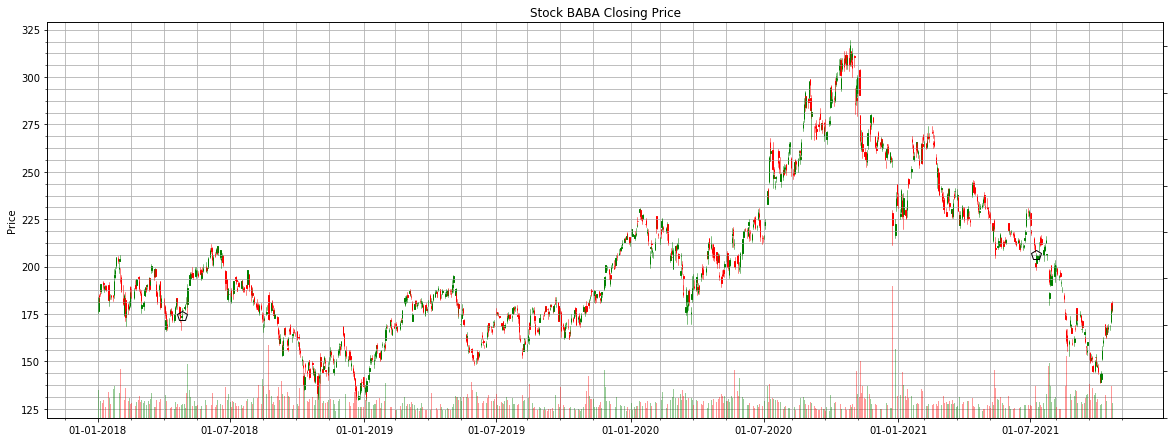

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['ladder_bottom'] !=0].index, df['Adj Close'].loc[df['ladder_bottom'] !=0],
                'pk', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-07-01':'2021-08-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ladder_bottom,VolumePositive
0,737972.0,228.070007,228.850006,221.550003,221.869995,221.869995,13316400,0,False
1,737973.0,219.160004,219.500000,216.460007,217.750000,217.750000,12989200,0,False
2,737977.0,215.320007,215.399994,209.373001,211.600006,211.600006,23719900,0,False
3,737978.0,211.610001,212.050003,207.820007,208.000000,208.000000,18340400,0,False
4,737979.0,201.710007,202.279999,198.259995,199.850006,199.850006,33992500,0,False


Text(0, 0.5, 'Price')

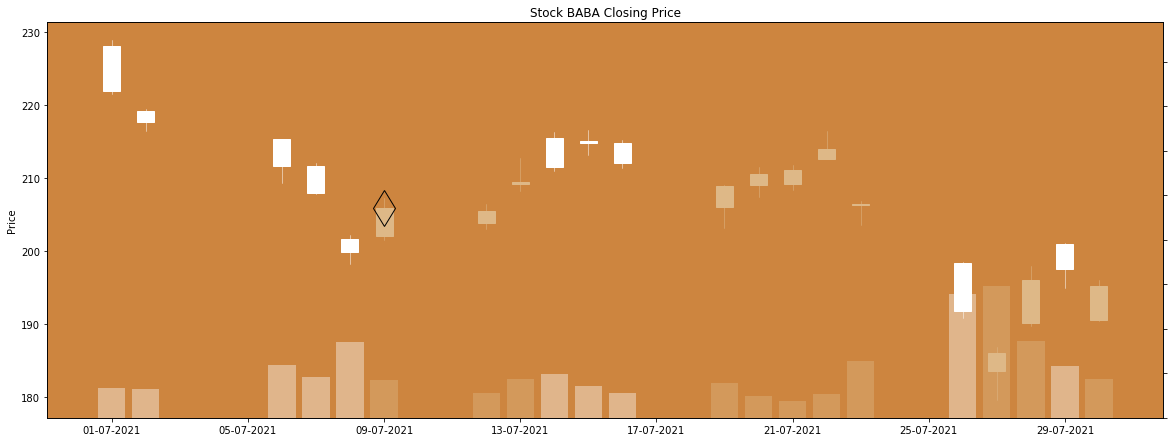

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('peru')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='burlywood', colordown='white', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['ladder_bottom'] !=0].index, df['Adj Close'].loc[df['ladder_bottom'] !=0],
                'dk', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'burlywood', False: 'white'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

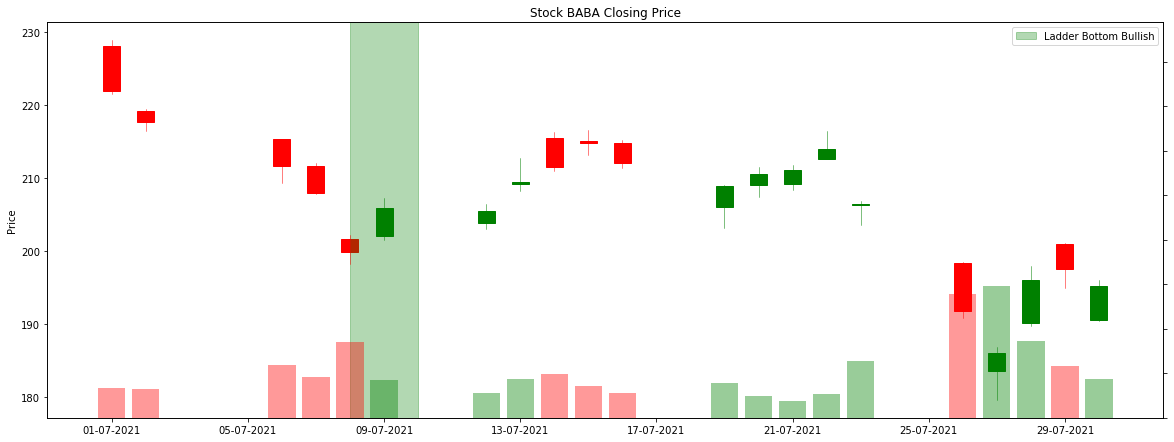

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,7,8)), date2num(datetime(2021,7,10)), 
           label="Ladder Bottom Bullish",color="green", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')